In [1]:
    # Introduction
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 50

def gen_data(n,h,sd1,sd2):
    x1 = ss.norm.rvs(-h,sd1,n)
    y1 = ss.norm.rvs(0,sd1,n)
    x2 = ss.norm.rvs(h,sd2,n)
    y2 = ss.norm.rvs(0,sd2,n)
    return (x1,y1,x2,y2)

In [3]:
(x1,y1,x2,y2) = gen_data(50,1,1,1.5)

In [4]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5)

In [5]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

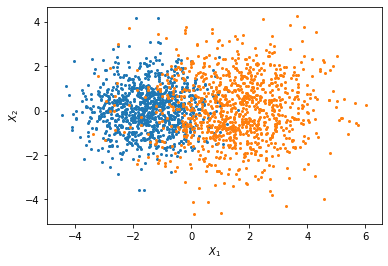

In [6]:
plot_data(x1,y1,x2,y2)

In [7]:
    # Logistic Regression in Code
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [8]:
X = np.vstack((np.vstack((x1,y1)).T , np.vstack((x2,y2)).T))

In [9]:
X.shape

(2000, 2)

In [10]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [11]:
y.shape

(2000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=1)

In [13]:
clf.fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
clf.score(X_test,y_test)

0.903

In [15]:
clf.predict_proba(np.array([-2,0]).reshape(1, -1))

array([[0.9613726, 0.0386274]])

In [16]:
clf.predict(np.array([-2,0]).reshape(1, -1))

array([1])

In [17]:
    # Computing Predictive Probabilities Across the Grid

In [18]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

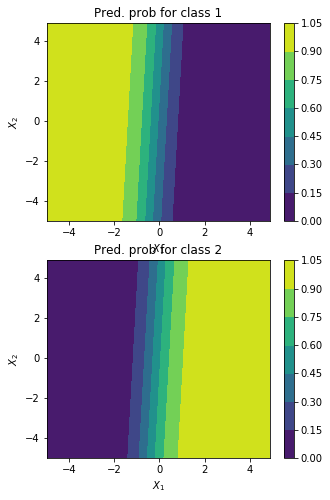

In [21]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");